#### Identitas:

In [1]:
print('NAMA:')
print('Daniel Beltsazar Marpaung')

NAMA:
Daniel Beltsazar Marpaung


#### Lakukan instruksi di bawah ini dengan menggunakan dataset yang telah disediakan!

In [2]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading datasets
#main dataset
df = pd.read_csv('D:/Milik Pribadi/Job Vacancy/Job/PT Sharing Vision Indonesia Data Scientist/notebook/data/covid.csv')
#region and climate dataset
df_cat = pd.read_csv('D:/Milik Pribadi/Job Vacancy/Job/PT Sharing Vision Indonesia Data Scientist/notebook/data/covid_cat.csv')

In [3]:
df.head()

,Unnamed: 0,country,province,date,confirmed,recovered,deaths
0,0,Afghanistan,0,2020-01-22,0.0,0.0,0.0
1,1,Albania,0,2020-01-22,0.0,0.0,0.0
2,2,Algeria,0,2020-01-22,0.0,0.0,0.0
3,3,Andorra,0,2020-01-22,0.0,0.0,0.0
4,4,Angola,0,2020-01-22,0.0,0.0,0.0


In [4]:
df_cat.head()

,country,region,climate
0,Afghanistan,Asia & Pacific,nontropic
1,Albania,Europe,nontropic
2,Algeria,Arab States,nontropic
3,Andorra,Europe,nontropic
4,Angola,Africa,tropic


#### 1. Dataframe 'df' terdiri dari (a) ... columns dan (b) ... rows. Dataframe 'df' mengandung data dari (c) ... 'country' yang berbeda. Dataframe 'df' mengandung data hasil observasi selama (d) .... hari terhitung sejak tanggal (e) ... sampai tanggal (f) ...

(a) 7 columns
<br>
(b) 175840 rows
<br>
(c) 195
<br>
(d) 628 hari
<br>
(e) 2020-01-22
<br>
(f) 2021-10-10

In [5]:
# 1(a) 
# 1(b)

df.shape

(175840, 7)

In [6]:
# 1(c)
df['country'].nunique()

195

In [7]:
# 1(d)
# 1(f)
# 1(g)
df['date']=pd.to_datetime(df['date'])
print('Jumlah hari observasi :', df['date'].nunique())
print('Tanggal pertama observasi :', df['date'].min())
print('Tanggal terakhir observasi :', df['date'].max())

Jumlah hari observasi : 628
Tanggal pertama observasi : 2020-01-22 00:00:00
Tanggal terakhir observasi : 2021-10-10 00:00:00


#### 2. Ubah beberapa data pada kolom 'country' agar tidak ada nama berbeda untuk negara yang sama dengan aturan:
'original data','replace with this data':
<br>
"('St. Martin',)",'St. Martin'
<br>
' Azerbaijan','Azerbaijan'
<br>
'Cabo Verde','Cape Verde'
<br>
'Congo (Brazzaville)','Congo'
<br>
'Congo (Kinshasa)','Congo'
<br>
'North Ireland','Ireland'
<br>
'North Macedonia','Macedonia'
<br>
'occupied Palestinian territory','Palestine'
<br>
'Holy See','Vatican'
<br>
'Republic of Ireland','Ireland'
<br>
'The Bahamas','Bahamas'
<br>
'The Gambia','Gambia'
<br>
'Bahamas, The','Bahamas'
<br>
'Gambia, The','Gambia'
<br>
'Vatican City','Vatican'
<br>
'East Timor','Timor-Leste'
<br>
'West Bank and Gaza','Palestine'
<br>
'MS Zaandam','Others'
<br>
'Diamond Princess','Others'

In [8]:
# 2
df = df.replace({'country':{"('St. Martin',)":'St. Martin',
' Azerbaijan':'Azerbaijan',
'Cabo Verde':'Cape Verde',
'Congo (Brazzaville)':'Congo',
'Congo (Kinshasa)':'Congo',
'North Ireland':'Ireland',
'North Macedonia':'Macedonia',
'occupied Palestinian territory':'Palestine',
'Holy See':'Vatican',
'Republic of Ireland':'Ireland',
'The Bahamas':'Bahamas',
'The Gambia':'Gambia',
'Bahamas, The':'Bahamas',
'Gambia, The':'Gambia',
'Vatican City':'Vatican',
'East Timor':'Timor-Leste',
'West Bank and Gaza':'Palestine',
'MS Zaandam':'Others',
'Diamond Princess':'Others'}})

#### 3. a. Beberapa 'country' pada dataframe 'df' data hariannya dibagi menjadi beberapa 'province'. Akumulasikan data 'confirmed','deaths', dan 'recovered' provinsi-provinsi ini sehingga data harian tiap negara hanya diwakili oleh 1 row dengan membuat dataframe baru 'df_new'.
#### b. Tambahkan kolom 'region' dan 'climate' pada 'df_new' dan isi dengan region dan climate untuk tiap negara dengan mengacu pada 'df_cat'
#### c. Filter 'df_new' sehingga hanya di include data tanggal 1 Maret 2020 - 13 Desember 2020. Drop semua row pada 'df_new' yang data 'confirmed'-nya di bawah 100. Drop semua row yang data 'region' atau 'climate'-nya NaN pada 'df_new'.
#### d. Buat line plot berdasarkan dataframe 'df_new' dengan data 'date' sebagai x dan data 'confirmed' sebagai y, di mana tiap garis mewakili data total (bukan rata-rata) 1 region.
#### e. Buat line plot berdasarkan dataframe 'df_new' dengan data 'date' sebagai x dan data 'confirmed' sebagai y, di mana tiap garis mewakili data total (bukan rata-rata) 1 kelompok iklim.

In [9]:
# 3.a. Beberapa 'country' pada dataframe 'df' data hariannya dibagi menjadi beberapa 'province'. Akumulasikan data 'confirmed','deaths', dan 'recovered' provinsi-provinsi 
# ini sehingga data harian tiap negara hanya diwakili oleh 1 row dengan membuat dataframe baru 'df_new'

df_new = df.groupby(['country','date'])[['confirmed','deaths','recovered']].sum()
df_new=df_new.reset_index()
df_new.tail(20)

,country,date,confirmed,deaths,recovered
121184,Zimbabwe,2021-09-21,128186.0,4569.0,0.0
121185,Zimbabwe,2021-09-22,128804.0,4592.0,0.0
121186,Zimbabwe,2021-09-23,129134.0,4600.0,0.0
121187,Zimbabwe,2021-09-24,129134.0,4600.0,0.0
121188,Zimbabwe,2021-09-25,129505.0,4603.0,0.0
121189,Zimbabwe,2021-09-26,129625.0,4604.0,0.0
121190,Zimbabwe,2021-09-27,129919.0,4607.0,0.0
121191,Zimbabwe,2021-09-28,130272.0,4615.0,0.0
121192,Zimbabwe,2021-09-29,130485.0,4616.0,0.0
121193,Zimbabwe,2021-09-30,130820.0,4623.0,0.0


In [10]:
# 3.b. Tambahkan kolom 'region' dan 'climate' pada 'df_new' 
# dan isi dengan region dan climate untuk tiap negara dengan mengacu pada 'df_cat'

df_new = pd.merge(df_new,df_cat,on='country',how='left')
df_new.head()

,country,date,confirmed,deaths,recovered,region,climate
0,Afghanistan,2020-01-22,0.0,0.0,0.0,Asia & Pacific,nontropic
1,Afghanistan,2020-01-23,0.0,0.0,0.0,Asia & Pacific,nontropic
2,Afghanistan,2020-01-24,0.0,0.0,0.0,Asia & Pacific,nontropic
3,Afghanistan,2020-01-25,0.0,0.0,0.0,Asia & Pacific,nontropic
4,Afghanistan,2020-01-26,0.0,0.0,0.0,Asia & Pacific,nontropic


In [11]:
# 3.c.  Filter 'df_new' sehingga hanya di include data tanggal 1 Maret 2020 - 13 Desember 2020. Drop semua row 
# pada 'df_new' yang data 'confirmed'-nya di bawah 100. Drop semua row yang data 'region' atau 'climate'-nya NaN pada 'df_new'

start_date = "2020-3-1"
end_date = "2020-12-13"
after_start_date = df_new["date"] >= start_date
before_end_date = df_new["date"] <= end_date
confirmed_more = df_new['confirmed']>=100
filtered_data = after_start_date & before_end_date & confirmed_more
df_new = df_new.loc[filtered_data]
df_new = df_new.dropna(subset = ['region', 'climate'])
df_new.head()

,country,date,confirmed,deaths,recovered,region,climate
66,Afghanistan,2020-03-28,106.0,2.0,2.0,Asia & Pacific,nontropic
67,Afghanistan,2020-03-29,114.0,4.0,2.0,Asia & Pacific,nontropic
68,Afghanistan,2020-03-30,114.0,4.0,2.0,Asia & Pacific,nontropic
69,Afghanistan,2020-03-31,166.0,4.0,5.0,Asia & Pacific,nontropic
70,Afghanistan,2020-04-01,192.0,4.0,5.0,Asia & Pacific,nontropic


Text(0, 0.5, 'Confirmed')

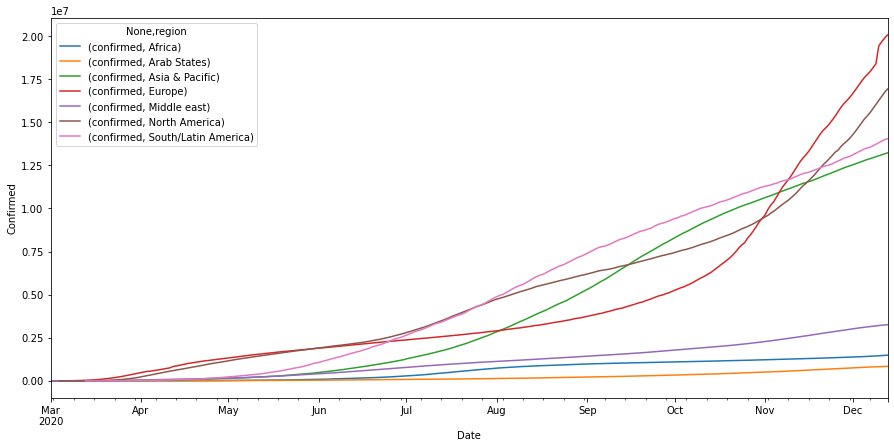

In [12]:
# 3.d Buat line plot berdasarkan dataframe 'df_new' dengan data 'date' sebagai x dan data 'confirmed' 
# sebagai y, di mana tiap garis mewakili data total (bukan rata-rata) 1 region

fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_new.groupby(['date','region'])[['confirmed']].sum().unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed')

# hasil plot pada sumbu y dikali 1e7 atau 10^7

Text(0, 0.5, 'Confirmed')

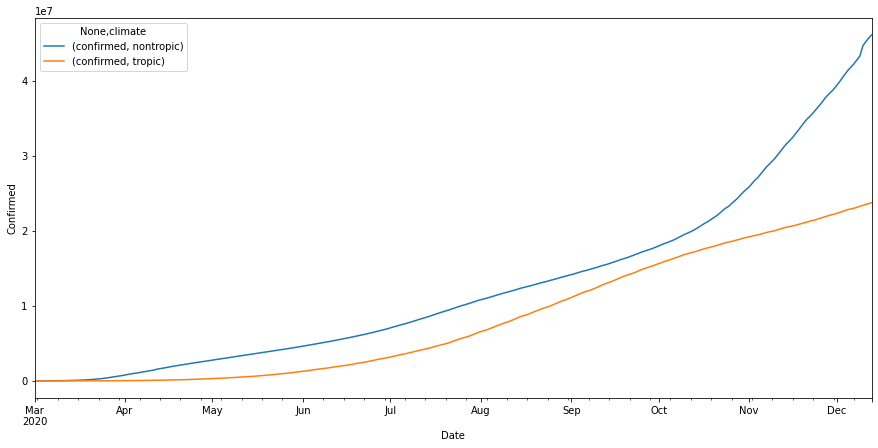

In [13]:
# 3.e Buat line plot berdasarkan dataframe 'df_new' dengan data 'date' sebagai x dan data 'confirmed' sebagai y, 
# di mana tiap garis mewakili data total (bukan rata-rata) 1 kelompok iklim

fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_new.groupby(['date','climate'])[['confirmed']].sum().unstack().plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed')

# hasil plot pada sumbu y dikali 1e7 atau 10^7

#### 4.a. Buat dataframe 'df_last' yang hanya mengandung data tanggal terakhir dari 'df_new', di mana tiap row menunjukkan data 'confirmed', 'deaths', 'recovered', 'region', dan 'climate' untuk 1 negara.
#### b. Berdasarkan df_last, identifikasi 10 negara dengan data 'deaths' tertinggi. Buat barplotnya.
#### c. Buat beberapa kolom baru pada 'df_last': 
##### Kolom 'active_case' yang merupakan hasil perhitungan 'confirmed' dikurangi 'recovered' dan 'deaths'. 
##### Kolom 'active_case_%' yang merupakan hasil perhitungan 'active_case' dibagi 'confirmed' dikali 100. 
##### Kolom 'deaths_%' yang merupakan hasil perhitungan 'deaths' dibagi 'confirmed' dikali 100. 
##### Kolom 'recovered_%' yang merupakan hasil perhitungan 'recovered' dibagi 'confirmed' dikali 100.
#### d. Buat scatter matrix berdassarkan 'df_last' untuk kolom 'active_case_%', 'deaths_%', dan 'recovered_%'  (bedakan warna scatter plot berdasarkan region).
#### e. Lakukan hal yang sama dengan membedakan warna scatter plot berdasarkan iklim.

In [14]:
# 4.a. Buat dataframe 'df_last' yang hanya mengandung data tanggal terakhir dari 'df_new', 
# di mana tiap row menunjukkan data 'confirmed', 'deaths', 'recovered', 'region', dan 'climate' untuk 1 negara.
df_last = df_new[df_new['date']=="2020-12-13"]
df_last = df_last.drop(['date'],axis=1)
df_last.head()

,country,confirmed,deaths,recovered,region,climate
326,Afghanistan,48952.0,1960.0,38250.0,Asia & Pacific,nontropic
954,Albania,48530.0,1003.0,24820.0,Europe,nontropic
1582,Algeria,92102.0,2596.0,60457.0,Arab States,nontropic
2210,Andorra,7338.0,79.0,6629.0,Europe,nontropic
2838,Angola,16188.0,371.0,8898.0,Africa,tropic


Text(0, 0.5, 'Deaths')

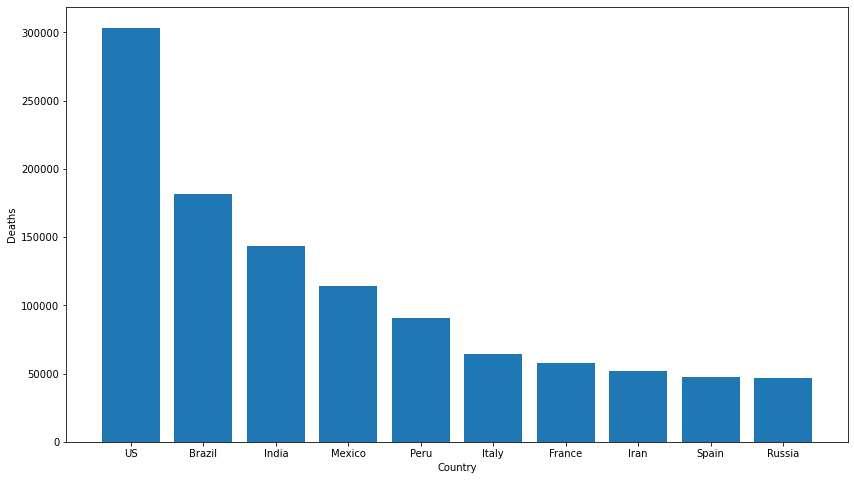

In [15]:
# 4.b Berdasarkan df_last, identifikasi 10 negara dengan data 'deaths' tertinggi. Buat barplotnya.

df_last_top10 = df_last.sort_values(by=['deaths'], ascending=False).head(10)

fig,ax = plt.subplots(figsize=(14,8))
plt.bar(df_last_top10['country'],df_last_top10['deaths'])
ax.set_xlabel('Country')
ax.set_ylabel('Deaths')

In [16]:
# 4.c Buat beberapa kolom baru pada 'df_last'

#Kolom 'active_case' yang merupakan hasil perhitungan 'confirmed' dikurangi 'recovered' dan 'deaths'.
#Kolom 'active_case_%' yang merupakan hasil perhitungan 'active_case' dibagi 'confirmed' dikali 100.
#Kolom 'deaths_%' yang merupakan hasil perhitungan 'deaths' dibagi 'confirmed' dikali 100.
#Kolom 'recovered_%' yang merupakan hasil perhitungan 'recovered' dibagi 'confirmed' dikali 100.

df_last['active_case']=df_last['confirmed']-(df_last['recovered']+df_last['deaths'])
df_last['active_case_%']=(df_last['active_case']/df_last['confirmed'])*100
df_last['deaths_%']=(df_last['deaths']/df_last['confirmed'])*100
df_last['recovered_%']=(df_last['recovered']/df_last['confirmed'])*100
df_last.head()

,country,confirmed,deaths,recovered,region,climate,active_case,active_case_%,deaths_%,recovered_%
326,Afghanistan,48952.0,1960.0,38250.0,Asia & Pacific,nontropic,8742.0,17.858310,4.003922,78.137768
954,Albania,48530.0,1003.0,24820.0,Europe,nontropic,22707.0,46.789615,2.066763,51.143623
1582,Algeria,92102.0,2596.0,60457.0,Arab States,nontropic,29049.0,31.540032,2.818614,65.641354
2210,Andorra,7338.0,79.0,6629.0,Europe,nontropic,630.0,8.585446,1.076588,90.337967
2838,Angola,16188.0,371.0,8898.0,Africa,tropic,6919.0,42.741537,2.291821,54.966642


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C25AD4D00>,
      dtype=object)

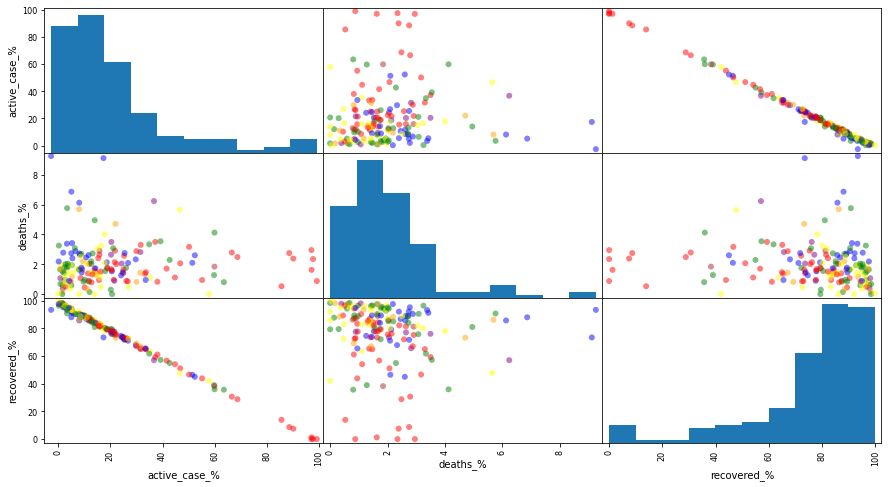

In [17]:
# 4.d Buat scatter matrix berdassarkan 'df_last' untuk 
# kolom 'active_case_%', 'deaths_%', dan 'recovered_%' (bedakan warna scatter plot berdasarkan region)

from pandas.plotting import scatter_matrix

colors_region = {'Europe':'red','Africa':'green','South/Latin America':'blue','Asia & Pacific':'yellow','Middle east':'orange', 'Arab States':'purple', 'North America':'brown'}

pd.plotting.scatter_matrix(df_last[['active_case_%','deaths_%','recovered_%']], alpha = 0.5, figsize = (15, 8), diagonal = 'hist', marker='o', c=df_last['region'].map(colors_region))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C25AD69A0>,
      dtype=object)

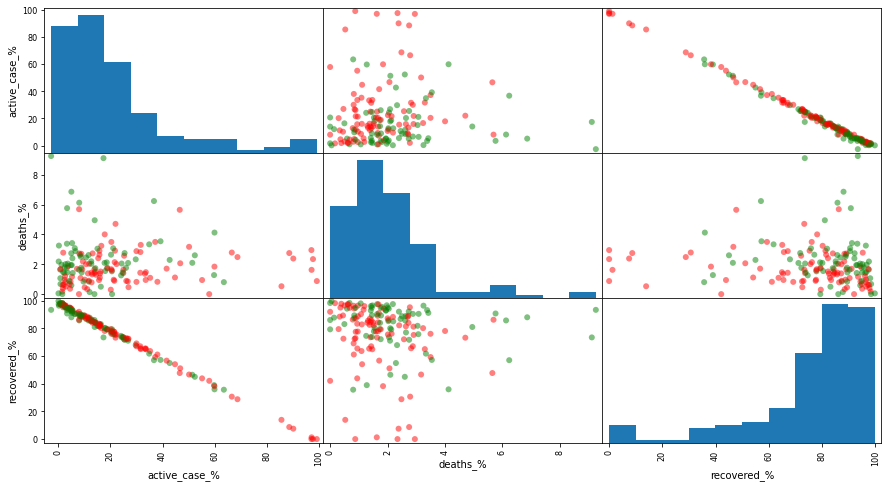

In [18]:
# 4.e Lakukan hal yang sama dengan membedakan warna scatter plot berdasarkan iklim.

colors_climate = {'nontropic':'red','tropic':'green'}

pd.plotting.scatter_matrix(df_last[['active_case_%','deaths_%','recovered_%']], alpha = 0.5, figsize = (15, 8), diagonal = 'hist', marker='o', c=df_last['climate'].map(colors_climate))


#### 5. a.  Dengan asumsi syarat melakukan tes Pearson terpenuhi, lakukan tes Pearson untuk menguji adanya hubungan linear antara data 'active_case_%', 'deaths_%', dan 'recovered_%'. Buatlah heatmapnya.
#### b. Carilah p-value dari koefisiensi korelasi yang telah didapatkan. Tuliskan kesimpulannya.

               active_case_%  deaths_%  recovered_%
active_case_%       1.000000  0.034203    -0.997663
deaths_%            0.034203  1.000000    -0.102413
recovered_%        -0.997663 -0.102413     1.000000


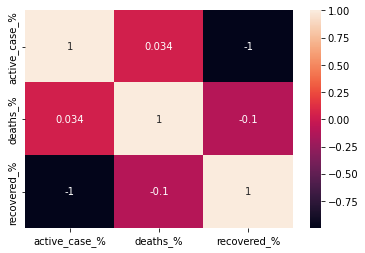

In [19]:
# 5.a
print (df_last[['active_case_%','deaths_%','recovered_%']].corr())
# untuk membuat heatmap saya memakai seaborn
import seaborn as sns
sns.heatmap(df_last[['active_case_%','deaths_%','recovered_%']].corr(), annot=True);

##### Kesimpulan no 5.a : Data active_case_% sangat berkorelasi negatif dengan data recovered_%. Hal ini terlihat dari nilai korelasi mereka dihasilkan nilai -0.997. Kita tahu bahwa nilai koefisien korelasi pearson berada di antara nilai -1<p<1 , di mana nilai 0 menandakan tidak ada korelasi sama sekali dan nilai 1 atau -1 menandakan total korelasi positif atau negatif. Untuk data deaths_% memiliki korelasi yang sama antara hubungan data deaths_% dengan active_case_%  atau dengan recovered_% yaitu senilai 0.03. Ini menandakan adanya korelasi namun tidak terlalu tinggi.

In [20]:
# 5.b
from scipy import stats
pearson_coef1, p_value1 = stats.pearsonr(df_last['active_case_%'], df_last['deaths_%'])
pearson_coef2, p_value2 = stats.pearsonr(df_last['active_case_%'], df_last['recovered_%'])
pearson_coef3, p_value3 = stats.pearsonr(df_last['deaths_%'], df_last['recovered_%'])
print("Korelasi Pearson antara active_case_% dan deaths_%", pearson_coef1, " dengan P-value =", p_value1)  
print("Korelasi Pearson antara active_case_% dan recovered_%", pearson_coef2, " dengan P-value =", p_value2)
print("Korelasi Pearson antara deaths_% dan recovered_%", pearson_coef3, " dengan P-value =", p_value3)

Korelasi Pearson antara active_case_% dan deaths_% 0.03420279015254477  dengan P-value = 0.6637174562888603
Korelasi Pearson antara active_case_% dan recovered_% -0.9976627521520626  dengan P-value = 1.0113427233958369e-190
Korelasi Pearson antara deaths_% dan recovered_% -0.1024131930659547  dengan P-value = 0.19191631175112334


##### Kesimpulan 5.b :

1. P-Value dari korelasi antara active_case_% dan deaths_% adalah 0.66371. Karena P-Value > 0.1 , maka tidak ada bukti bahwa korelasi mereka signifikan.

2. P-Value dari korelasi antara active_case_% dan recovered_% adalah 1.0113427233958369e-190. Karena P-Value < 0.001, maka bisa dikatakan terdapat bukti kuat bahwa korelasi mereka signifikan.

1. P-Value dari korelasi antara deaths_% dan recovered_% adalah 0.191916. Karena P-Value > 0.1 , maka tidak ada bukti (bukti lemah) bahwa korelasi mereka signifikan.


#### 6. Dengan asumsi syarat melakukan tes ANOVA terpenuhi, lakukan ANOVA untuk menguji adanya hubungan antara region dan data 'active_case_%', 'deaths_%', dan 'recovered_%' (3 TES ANOVA YANG BERBEDA) pada 'df_last'. Tuliskan kesimpulan dari hasil tesnya.

In [52]:
# 6
# region-active_case_%

from scipy.stats import f_oneway
CategoryGroupLists1=df_last.groupby('region')['active_case_%'].apply(list)
AnovaResults1 = f_oneway(*CategoryGroupLists1)
print('P-Value for Anova is: ', AnovaResults1[1])

P-Value for Anova is:  3.826063859655487e-06


In [53]:
# 6
# region-deaths_%

from scipy.stats import f_oneway
CategoryGroupLists2=df_last.groupby('region')['deaths_%'].apply(list)
AnovaResults2 = f_oneway(*CategoryGroupLists2)
print('P-Value for Anova is: ', AnovaResults2[1])

P-Value for Anova is:  0.005674002083079122


In [54]:
# 6
# region-recovered_%

from scipy.stats import f_oneway
CategoryGroupLists3=df_last.groupby('region')['recovered_%'].apply(list)
AnovaResults3 = f_oneway(*CategoryGroupLists3)
print('P-Value for Anova is: ', AnovaResults3[1])

P-Value for Anova is:  7.1621169013953965e-06


##### Kesimpulan No 6 : hubungan korelasi antara region dengan active_case, deaths,recovered cukup kuat dikarenakan nilai p-value yang semuanya hampir mendekati 0

#### 7. Dengan asumsi syarat melakukan independent t-test terpenuhi, lakukan independent t-test untuk menguji adanya hubungan antara kelompok iklim dan data 'active_case_%', 'deaths_%', dan 'recovered_%' (3 INDEPENDENT T-TEST YANG BERBEDA) pada 'df_last'. Tuliskan kesimpulan dari hasil tesnya.

In [60]:
# 7 

from scipy.stats import ttest_ind
test1 = df_last[df_last['climate']=='nontropic']
test2 = df_last[df_last['climate']=='tropic']

ttest_ind(test1['active_case_%'], test2['active_case_%'])

Ttest_indResult(statistic=3.2417824358575826, pvalue=0.0014421295527031735)

In [62]:
# 7 

from scipy.stats import ttest_ind
test1 = df_last[df_last['climate']=='nontropic']
test2 = df_last[df_last['climate']=='tropic']

ttest_ind(test1['deaths_%'], test2['deaths_%'])

Ttest_indResult(statistic=-2.7991831879839455, pvalue=0.005745789417378428)

In [63]:
# 7 

from scipy.stats import ttest_ind
test1 = df_last[df_last['climate']=='nontropic']
test2 = df_last[df_last['climate']=='tropic']

ttest_ind(test1['recovered_%'], test2['recovered_%'])

Ttest_indResult(statistic=-3.0215921280290945, pvalue=0.002923234765115362)

##### Kesimpulan no 7 : P-Value masing-masing fitur jauh di bawah level signifikansi 0.05 sehingga rata-rata statistik kelompok iklim tropis dan nontropis saling berbeda secara statistik

#### 8. Buat kolom 'safety' pada 'df_last'. Apabila data suatu negara memenuhi 'active_case_%' < 10, 'deaths_%' < 5, 'recovered_%' > 85 labeli negara ini dengan 'safe' pada kolom 'safety'. Apabila tidak memenuhi kriteria, labeli dengan 'not_safe'. Berapa negara yang masuk kategori 'safe'? Berapa negara yang masuk kategori 'not_safe'?

In [22]:
# 8

def conditions(s):
    if (s['active_case_%'] < 10) & (s['deaths_%'] < 5) & (s['recovered_%'] > 85):
        return 'safe'
    else:
        return 'not_safe'

In [23]:
# 8

df_last['safety']=df_last.apply(conditions,axis=1)
df_last.head()

,country,confirmed,deaths,recovered,region,climate,active_case,active_case_%,deaths_%,recovered_%,safety
326,Afghanistan,48952.0,1960.0,38250.0,Asia & Pacific,nontropic,8742.0,17.858310,4.003922,78.137768,not_safe
954,Albania,48530.0,1003.0,24820.0,Europe,nontropic,22707.0,46.789615,2.066763,51.143623,not_safe
1582,Algeria,92102.0,2596.0,60457.0,Arab States,nontropic,29049.0,31.540032,2.818614,65.641354,not_safe
2210,Andorra,7338.0,79.0,6629.0,Europe,nontropic,630.0,8.585446,1.076588,90.337967,safe
2838,Angola,16188.0,371.0,8898.0,Africa,tropic,6919.0,42.741537,2.291821,54.966642,not_safe


#### 9. a. Buat DataFrame baru dengan yang mengeksklusi data Indonesia, US, Brazil, New Zealand, Singapore dari 'df_last'. Buatlah classifier model untuk memprediksi kategori 'safety' pada DataFrame yang baru dibuat. Tampilkan nilai performance dari model yang Anda buat.

#### b. Gunakan model classifier yang Anda buat untuk melabeli kategory 'safety' pada data Indonesia, US, Brazil, New Zealand, Singapore dari 'df_last'. Apa label 'safety' yang diprediksi oleh model Anda untuk masing-masing negara tersebut? Apakah hasil prediksi model Anda sesuai dengan kriteria safety pada nomor 8? Apabila tidak, faktor apa yang mempengaruhinya?

In [24]:
# 9.a

new_df = df_last[(df_last['country']=='Indonesia')| (df_last['country']=='US')|(df_last['country']=='Brazil')|(df_last['country']=='New Zealand')|(df_last['country']=='Singapore')]
new_df

,country,confirmed,deaths,recovered,region,climate,active_case,active_case_%,deaths_%,recovered_%,safety
14770,Brazil,6901952.0,181402.0,6138349.0,South/Latin America,tropic,582201.0,8.435309,2.628271,88.936420,safe
48682,Indonesia,617820.0,18819.0,505836.0,Asia & Pacific,tropic,93165.0,15.079635,3.046033,81.874332,not_safe
77570,New Zealand,2096.0,25.0,2015.0,Asia & Pacific,nontropic,56.0,2.671756,1.192748,96.135496,safe
97666,Singapore,58320.0,29.0,58208.0,Asia & Pacific,tropic,83.0,0.142318,0.049726,99.807956,safe
112738,US,16463227.0,303463.0,6298082.0,North America,nontropic,9861682.0,59.901270,1.843278,38.255453,not_safe


In [25]:
# 9.a

# Karena target kita adalah safety maka kolom region dan country sebenarnya tidak terlalu relevan karena safety dipengaruhi nilai
# -nilai angka atau indeks kasus covid.

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_fitur = df_last.drop(['country','region', 'safety', 'climate'],axis=1)

# scaling
stdscalar = StandardScaler()
data_scale = stdscalar.fit_transform(data_fitur)
fitur_scale = pd.DataFrame(data_scale,columns=data_fitur.columns)
fitur_scale.head()


,confirmed,deaths,recovered,active_case,active_case_%,deaths_%,recovered_%
0,-0.233650,-0.237823,-0.240653,-0.154237,-0.154613,1.336931,0.062484
1,-0.233912,-0.267214,-0.253778,-0.136722,1.176864,0.039071,-1.174032
2,-0.206905,-0.218290,-0.218951,-0.128767,0.475047,0.542797,-0.509937
3,-0.259443,-0.295592,-0.271556,-0.164411,-0.581369,-0.624328,0.621336
4,-0.253958,-0.286624,-0.269339,-0.156523,0.990563,0.189856,-0.998912


In [26]:
# 9.a

# label encoding label target (safety)

target_encoded= df_last[['safety']].copy()
for col in target_encoded.select_dtypes(include='O').columns:
    target_encoded [col]=le.fit_transform(target_encoded[col])
    
target_encoded.head()

,safety
326,0
954,0
1582,0
2210,1
2838,0


In [27]:
# 9.a

X=fitur_scale
y=target_encoded

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [28]:
# 9.a

# pembuatan model KNN
model_knn = KNeighborsClassifier(n_neighbors=15,weights='distance',leaf_size=34)
model_knn.fit(X_train,y_train)

<ipython-input-28-72d5ef1c7579>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_knn.fit(X_train,y_train)


KNeighborsClassifier(leaf_size=34, n_neighbors=15, weights='distance')

In [29]:
# 9.a

#akurasi model
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
y_pred = model_knn.predict(X_test)
print('Akurasi model pada data test:',accuracy_score(y_test,y_pred))

Akurasi model pada data test: 0.9696969696969697


###### Didapat akurasi model K-Nearest Neighbor (KNN) pada data sebesar 96.9% (kemungkinan besar masih overfitting)

In [30]:
# 9.b
df_newpred = new_df.drop(['country','region', 'safety','climate'],axis=1)

safety_pred = model_knn.predict(df_newpred)
safety_pred

array([0, 0, 0, 0, 0])

In [31]:
# 9.b
    
new_df['safety_prediksi_']='not_safe'
new_df.head()

<ipython-input-31-9238f3a05602>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['safety_prediksi_']='not_safe'


,country,confirmed,deaths,recovered,region,climate,active_case,active_case_%,deaths_%,recovered_%,safety,safety_prediksi_
14770,Brazil,6901952.0,181402.0,6138349.0,South/Latin America,tropic,582201.0,8.435309,2.628271,88.936420,safe,not_safe
48682,Indonesia,617820.0,18819.0,505836.0,Asia & Pacific,tropic,93165.0,15.079635,3.046033,81.874332,not_safe,not_safe
77570,New Zealand,2096.0,25.0,2015.0,Asia & Pacific,nontropic,56.0,2.671756,1.192748,96.135496,safe,not_safe
97666,Singapore,58320.0,29.0,58208.0,Asia & Pacific,tropic,83.0,0.142318,0.049726,99.807956,safe,not_safe
112738,US,16463227.0,303463.0,6298082.0,North America,nontropic,9861682.0,59.901270,1.843278,38.255453,not_safe,not_safe


#### 10. Buatlah model regresi untuk data 'active_case_%' di US pada 'df_last'. Plot model regresi ini bersama data aslinya dalam satu graph. Hitung nilai performance dari model regresi yang Anda buat.

In [32]:
# 10

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_new = df_last.drop(['country','region', 'safety','climate','active_case_%'],axis=1)
y_new = df_last['active_case_%']
X_Train, X_Test, y_Train, y_Test = train_test_split(X_new, y_new, test_size=0.2, random_state=21)

In [33]:
# 10

lr.fit(X_Train,y_Train)

LinearRegression()

In [34]:
# 10

print('intercept : ',lr.intercept_)
print('slope :',lr.coef_)

intercept :  99.99999999999987
slope : [ 8.36227638e-12 -8.36219323e-12 -8.36227772e-12 -8.36227811e-12
 -1.00000000e+00 -1.00000000e+00]


In [35]:
# 10

y_Pred = lr.predict(X_Test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, y_Pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, y_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, y_Pred)))

Mean Absolute Error: 4.608005896048181e-13
Mean Squared Error: 1.2650103212830514e-24
Root Mean Squared Error: 1.1247267762808225e-12


Text(0, 0.5, 'active_case_%')

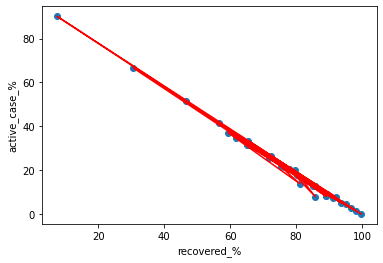

In [36]:
# 10

# Akan sulit diplot karena data train terdiri dari banyak dimensi. Saya belum tahu caranya.
# Namun di sini saya coba tampilkan data asli recovered_% dengan hasil regresi yaitu active_case_% beserta plot regresinya
plt.scatter(X_Test['recovered_%'], y_Test)
plt.plot(X_Test['recovered_%'], y_Pred, c='r')
plt.xlabel('recovered_%')
plt.ylabel('active_case_%')


#### 11. a. Buatlah clustering model dengan jumlah cluster sebanyak 5 (cluster 0-4) untuk array 'Z'. Sebutkan prediksi nomor cluster berdasarkan data 'active_case_%', 'deaths_%', dan 'recovered_%' pada 'df_last' untuk negara:
##### i. Indonesia
##### ii. Singapore
##### iii. US
##### iv. Italy
##### v. Iran
#### b. Buat plot 3D dari clustering model yang Anda buat.

In [37]:
# 11.a

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(df_last[['active_case_%','deaths_%','recovered_%']])

KMeans(n_clusters=5, random_state=0)

In [38]:
kmeans.cluster_centers_

array([[56.82812199,  2.29622568, 40.87565233],
       [ 5.61868643,  1.88215849, 92.49915509],
       [19.11673023,  2.02601577, 78.857254  ],
       [93.59666273,  1.92329552,  4.48004175],
       [35.30222595,  2.27816793, 62.41960612]])

In [39]:
# 11.a

df_cluster = df_last[(df_last['country']=='Indonesia')| (df_last['country']=='Singapore')|(df_last['country']=='US')|(df_last['country']=='Italy')|(df_last['country']=='Iran')]
df_cluster

,country,confirmed,deaths,recovered,region,climate,active_case,active_case_%,deaths_%,recovered_%,safety
48682,Indonesia,617820.0,18819.0,505836.0,Asia & Pacific,tropic,93165.0,15.079635,3.046033,81.874332,not_safe
49310,Iran,1108269.0,52196.0,812270.0,Middle east,nontropic,243803.0,21.998540,4.709687,73.291773,not_safe
51822,Italy,1843712.0,64520.0,1093161.0,Europe,nontropic,686031.0,37.209228,3.499462,59.291310,not_safe
97666,Singapore,58320.0,29.0,58208.0,Asia & Pacific,tropic,83.0,0.142318,0.049726,99.807956,safe
112738,US,16463227.0,303463.0,6298082.0,North America,nontropic,9861682.0,59.901270,1.843278,38.255453,not_safe


In [40]:
# 11.a
y_kmeans = kmeans.predict(df_cluster[['active_case_%','deaths_%','recovered_%']])
y_kmeans

array([2, 2, 4, 1, 0])

##### Kesimpulan 11.a :
1. Indonesia : Cluster 2
2. Iran     : Cluster 2
3. Italy    : Cluster 4
4. Singapore : Cluster 1
5. US        : Cluster 0

In [44]:
# 11.b

z = df_last[['active_case_%', 'deaths_%', 'recovered_%']].values

In [45]:
# 11.b

y_clusters = kmeans.fit_predict(z)

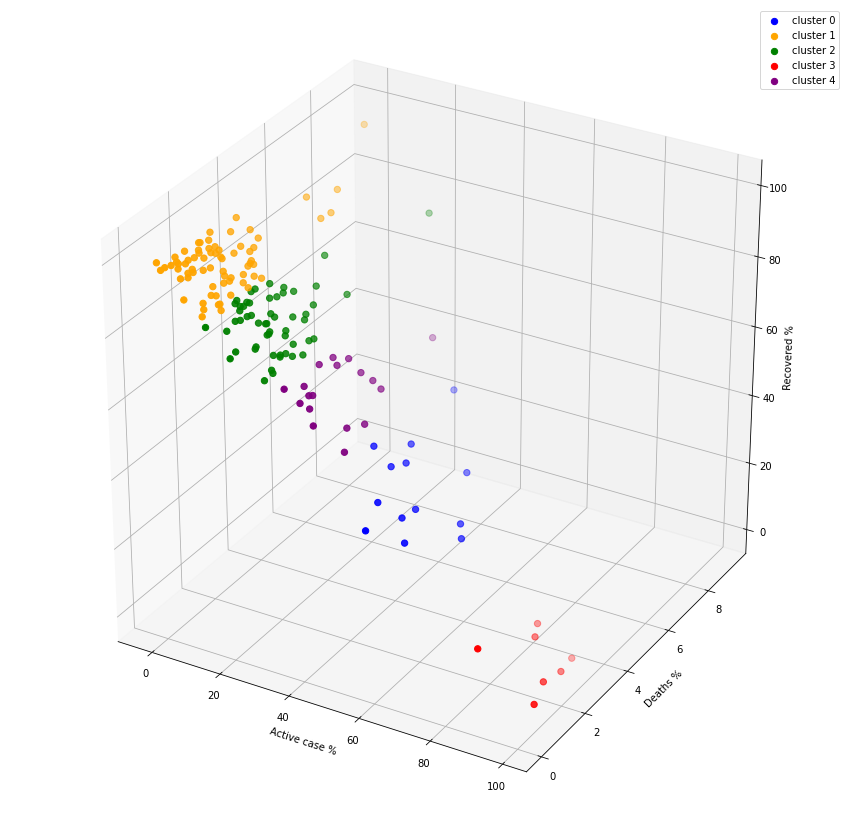

In [48]:
# 11.b

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(z[y_clusters == 0,0],z[y_clusters == 0,1],z[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(z[y_clusters == 1,0],z[y_clusters == 1,1],z[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(z[y_clusters == 2,0],z[y_clusters == 2,1],z[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(z[y_clusters == 3,0],z[y_clusters == 3,1],z[y_clusters == 3,2], s = 40 , color = 'red', label = "cluster 3")
ax.scatter(z[y_clusters == 4,0],z[y_clusters == 4,1],z[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Active case %')
ax.set_ylabel('Deaths %')
ax.set_zlabel('Recovered %')
ax.legend()
plt.show()

#### 12. (Optional) Tampilkan grafik-grafik yang Anda buat dalam bentuk dashboard menggunakan Dash by Plotly. 